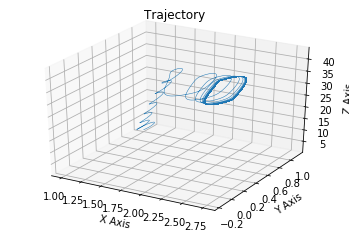

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


#Funcion de Thomas para diferentes valores de x, y y z en forma de vector


def thomas(x, t):
    return np.array([0.54361*np.sin(x[1]+x[0]) - 0.36*x[0]*x[1],
            0.5250*x[0]*np.sin(x[2]) -  0.2582*x[1],
            np.sin(x[0]) -  0.2127*x[2]+1.2*x[1]*x[2]])
#Preparamos el vector de thomas
dt = 0.01
t = np.arange ( 0, 10, dt)
num_steps = 500000
x0 = np.empty([num_steps + 1, 3])


# Valores iniciales
x0[0,:] = [1.,1.,1.]
# Calcular Thomas en cada punto de x, y, z Tenemos 100001 muestras
i = 0
for i in range(num_steps):
    x_dot = thomas(x0[i,:],t)
    x0[i+1,:] = x0[i,:] +  np.asarray(x_dot) * dt


# Grafica
fig = plt.figure()
ax = fig.gca(projection='3d')


ax.plot(x0[:,0], x0[:,1], x0[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trajectory")


plt.show()
 



  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 812
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 4.99997e+01,
       4.99998e+01, 4.99999e+01])
 t_events: None
        y: array([[ 1.00000000e+00,  1.00004574e+00,  1.00009149e+00, ...,
         2.76969445e+00,  2.76977215e+00,  2.76984984e+00],
       [ 0.00000000e+00,  4.41785586e-05,  8.83597810e-05, ...,
        -3.99201601e-01, -3.99253897e-01, -3.99306165e-01],
       [ 1.00000000e+00,  1.00006288e+00,  1.00012577e+00, ...,
         3.58677825e+00,  3.58656647e+00,  3.58635467e+00]])
 y_events: None
SINDy(differentiation_method=FiniteDifference(),
      feature_library=<pysindy.feature_library.custom_library.CustomLibrary object at 0x7fe87df924c0>,
      optimizer=STLSQ())


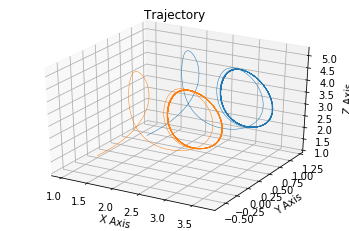

In [8]:
import pysindy as ps
from scipy . integrate import solve_ivp as ivp



n_trayectorias = 1
dt = 0.0001
def thomas(t, x):
    return np.array([0.54361*np.sin(x[1]+x[0]) - 0.36*x[0]*x[1],
            0.5250*x[0]*np.sin(x[2]) -  0.2582*x[1],
            np.sin(x[0]) -  0.2127*x[2]+1.2*x[1]*x[2]])


#x0s = np.array([np.double(1), np.double(3), np.double(5)]) * (np.double(np.random.rand(n_trayectorias, 3)) - 
#    np.double(0.5)) + (np.array([np.double(0), np.double(0), np.double(10)]))


x0s = np.array([1.,0.,1.],dtype=np.float64)


x_train_multi = []
x_train_multi1 = []


t_train_multi = []


#for i in range(n_trayectorias):
n_samples = 500000
t = np.arange(0, n_samples * dt, dt)
sol = ivp(thomas, (t[0],t[-1]), x0s, t_eval=t)
x_train_multi1.append(np.double( sol.y.T ))
x_train_multi.append(np.double( sol.y.T )+ 1.5 * np.random.randn(*x_train_multi))
t_train_multi.append(t)

print(sol)
#Mas vectores
#x0s = np.array([np.double(10), np.double(25), np.double(30)]) * (np.double(np.random.rand(n_trayectorias, 3)) - 
 #   np.double(0.5)) + (np.array([np.double(0), np.double(0), np.double(30)]))


#for i in range(n_trayectorias):
#    n_samples = np.random.randint(150000, 300000)
#    t = np.arange(0, n_samples * dt, dt)
#    x_train_multi.append(np.double(odeint(thomas, x0s[i], t)))
#    t_train_multi.append(t)


#Definimos nuestra propia libreria con las funciones de las que depende
#           0.54361*np.sin(x[1]+x[0]) - 0.0036*x[0]*x[1],
#           0.5250*x[0]*np.sin(x[2]) -  0.2582*x[1],
#           np.sin(x[0]) -  0.002127*x[2]


library_functions = [
    lambda x   : x,
    lambda x   : np.sin(x),
    lambda x,y : np.sin(x+y),
    lambda x,y : x*np.sin(y),
    lambda x,y : x*y
]
library_function_names = [
    lambda x   : x,
    lambda x   : 'sin('+ x +')',
    lambda x,y : 'sin(' + x + '+' + y + ')',
    lambda x,y : x + 'sin(' + y + ')',
    lambda x,y : x+'*'+y
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)
model = ps.SINDy(feature_library=custom_library)
print(model)


fig = plt.figure()
ax = fig.gca(projection='3d')


ax.plot(x_train_multi[0][:,0], x_train_multi[0][:,1], x_train_multi[0][:,2], lw=0.5)
ax.plot(x_train_multi1[0][:,0], x_train_multi1[0][:,1], x_train_multi1[0][:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Trajectory")


plt.show()
